abcd

# Temperature versus depth for present-day subducting slabs

This notebook uses the results of a study by Syracuse et al (PEPI, 2010) to illustrate the modelled depth to the Curie isotherm for 55 locations along the present-day subduction zones. The Curie isotherm (assuming a value of 550 deg-C) is plotted to give a first-order indication of how deep the magnetisation may be in each region, and how much it varies between regions.

The range of locations considered by Syracuse et al (2010) is shown here:



In [1]:
from IPython.display import Image
Image('../Images/Syracuse++_2010_Figure1.png')

FileNotFoundError: No such file or directory: '../Images/Syracuse++_2010_Figure1.png'

FileNotFoundError: No such file or directory: '../Images/Syracuse++_2010_Figure1.png'

<IPython.core.display.Image object>

For each of the points plotted, they constructed 4 alternative models for the temperature field. Here is one example, for Alaska.

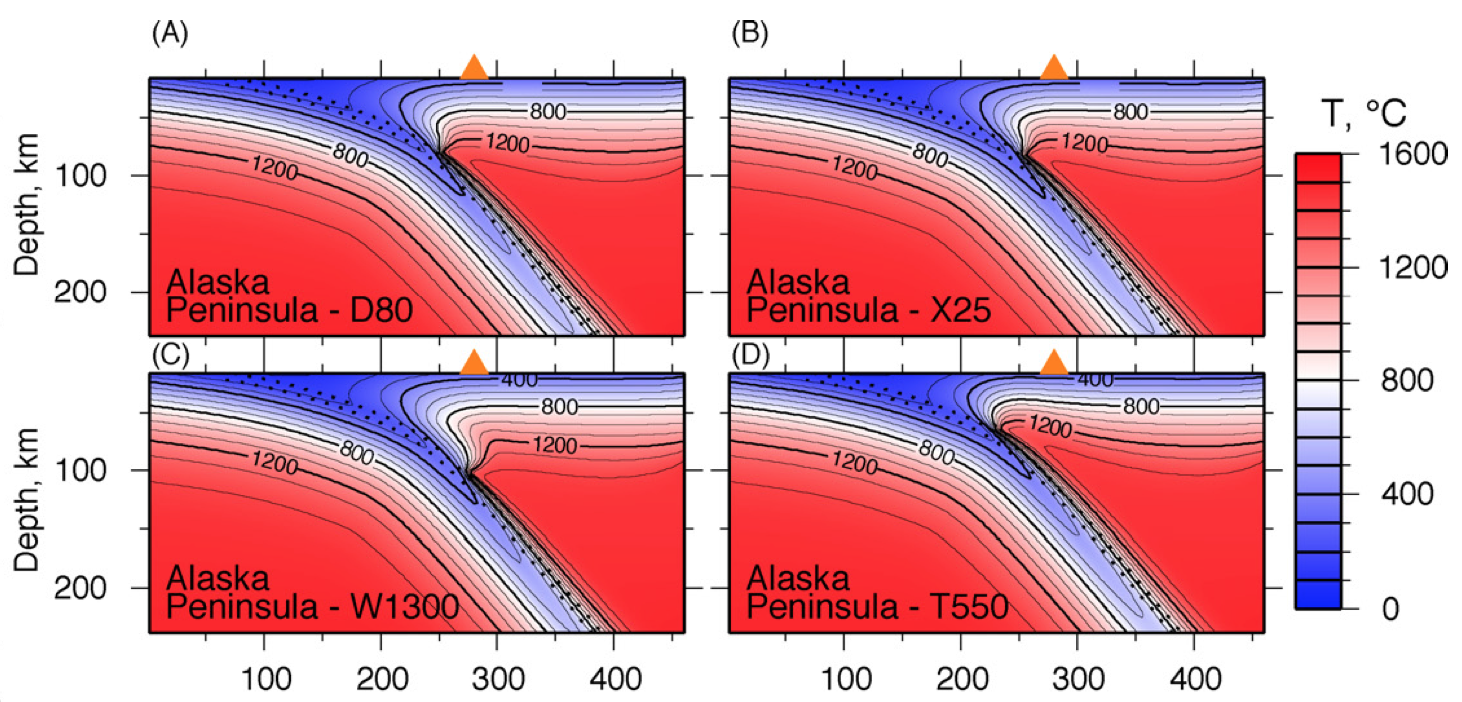

In [2]:
from IPython.display import Image
Image('../Images/Syracuse++_2010_Figure5.png')

Note the dotted lines on the above figure. These lines define the 'surface' and 'moho' for the crust of the slab (assumed 7 km apart based on average thickness of oceanic crust). 

The supplementary material from the Syracuse et al (2010) paper gives the temeperature along these two horizons for each of the 4 models, and for each of the 55 subduction zone sites. The code below reads in the files for one of these model (options are D30, X25, W1300, T550) and plots them. Colours along each line are mapped to depth.

[TODO Add colour legend bar along bottom]

Also plotted are horizontal lines to illustrate depths to the 550 deg-C contour for each slab. There are two lines for each plot; red is the depth to the 550 deg-C contour on the slab surface, blue is for the slab moho
[TODO these lines seem to be wrong, need to figure out why]

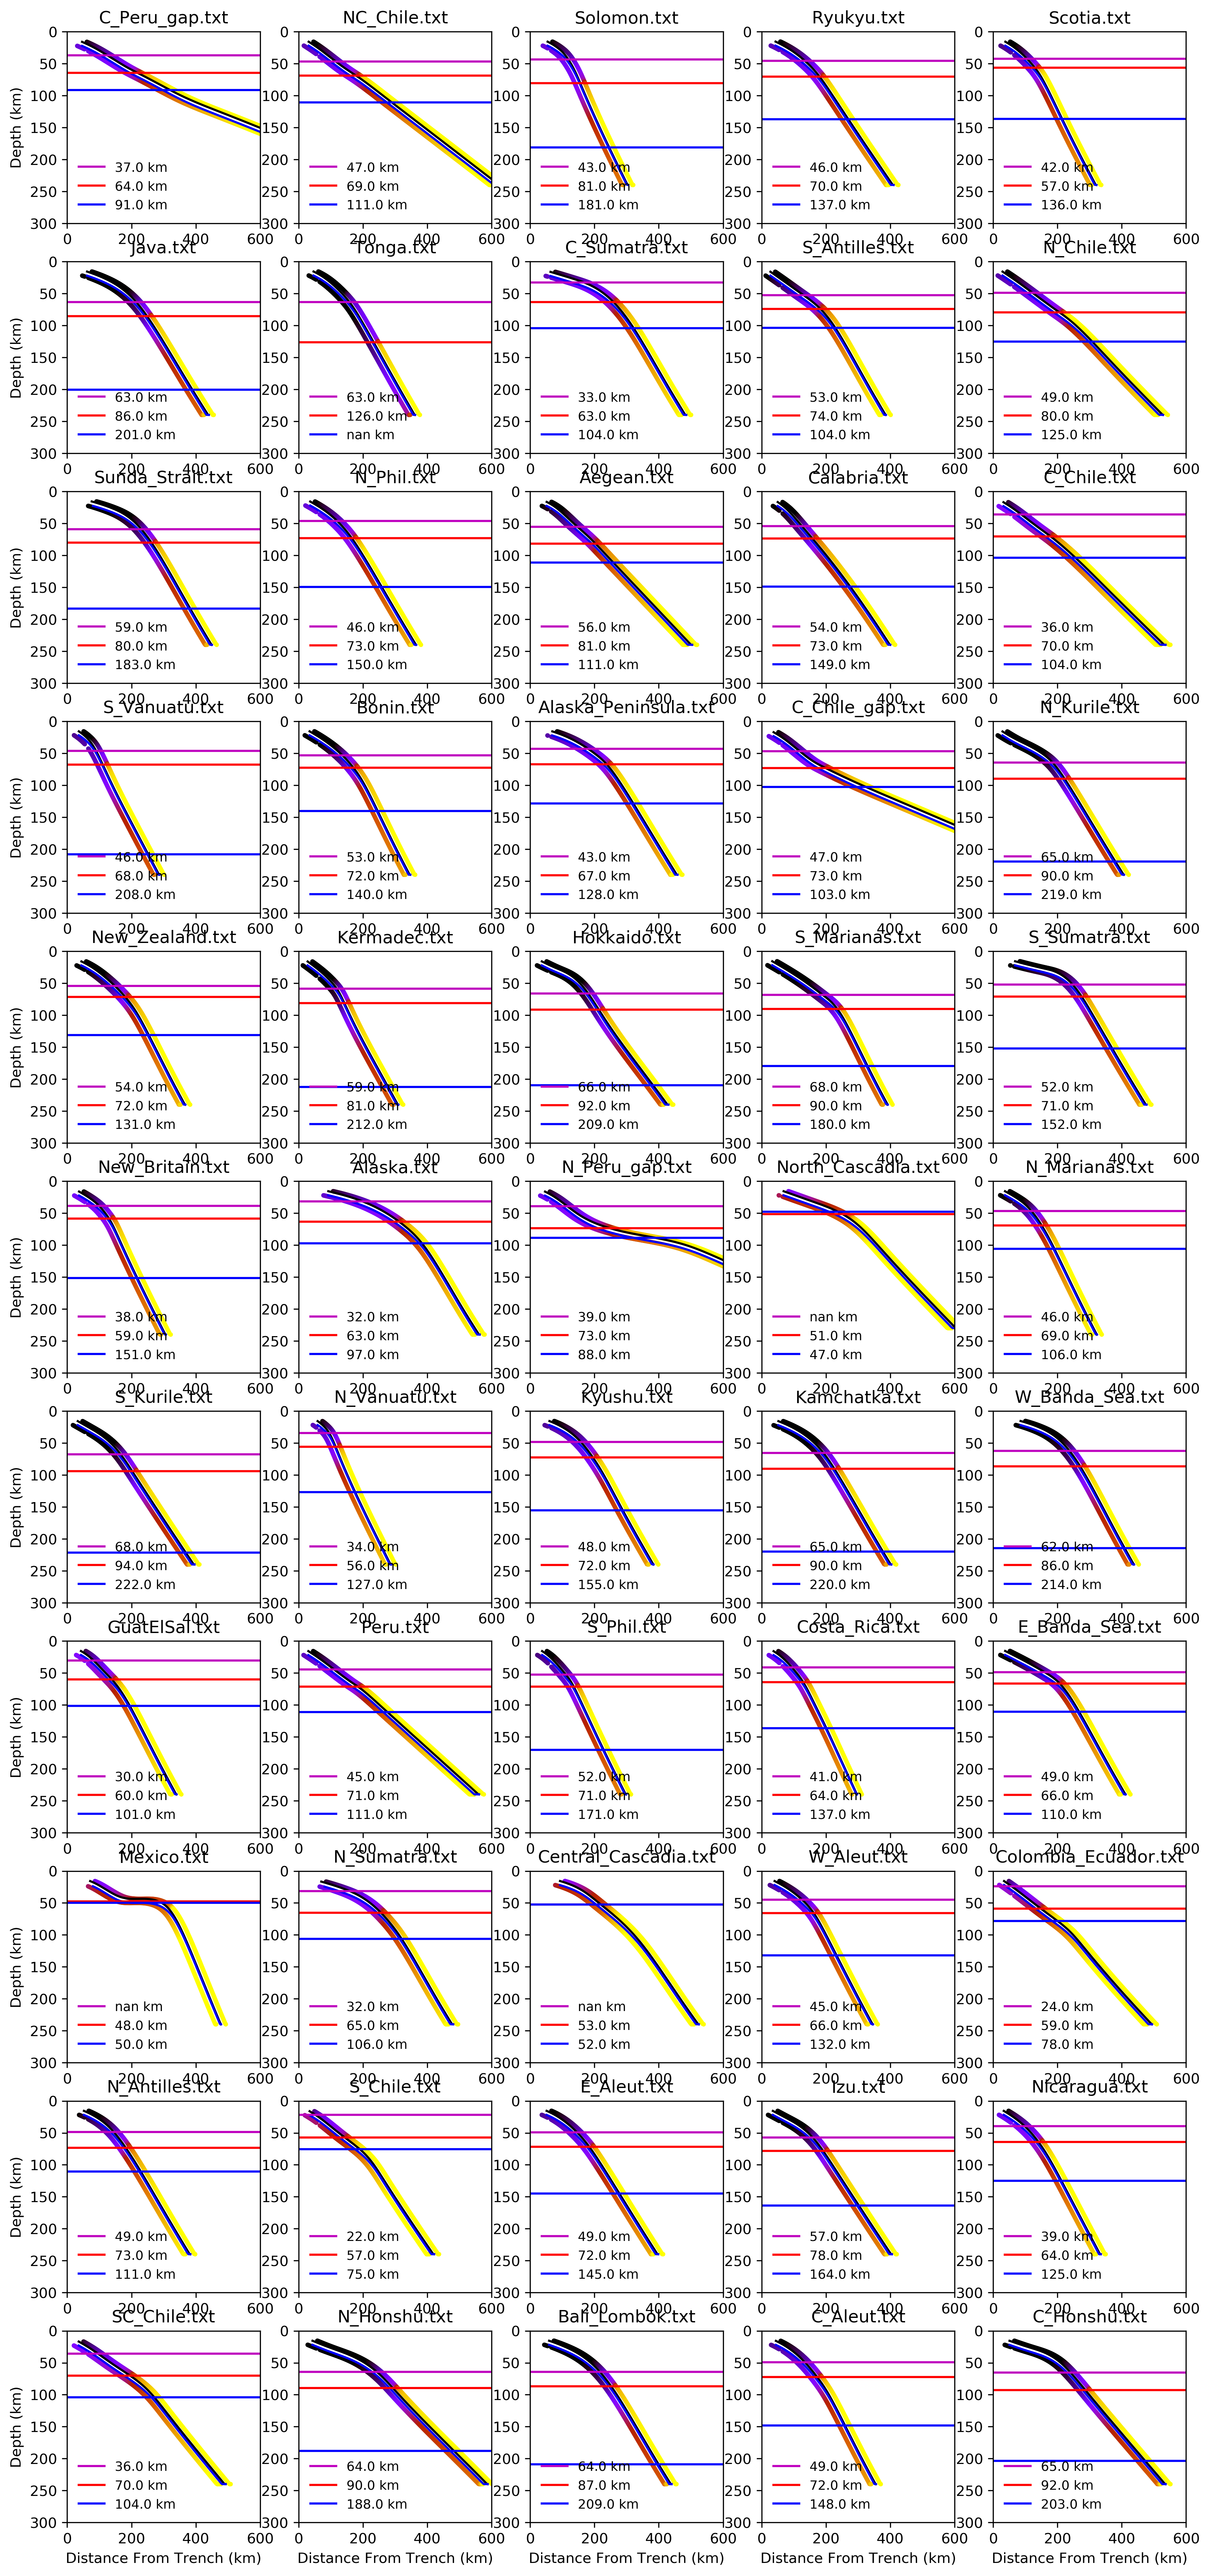

In [9]:
from os import walk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

# Options for Model are:
#  - D80
#  - X25
#  - W1300
#  - T550
MODEL = 'T550'

SlabDir = '../SlabData/SlabXZT/%s/' % MODEL

f=[]
for(dirpath,dirnames,filenames) in walk(SlabDir):
    f.extend(filenames)
    break

#print f

Shift=0

fig = plt.figure(figsize=(14,32),dpi=300)

MagnetiteIsoDepths = []
SurfaceCurieIsoDepths = []

for j in np.arange(0,55):

    FNAME = f[j+1+Shift]
    
    fid=open(SlabDir+'/'+FNAME,'r');
    
    SurfaceArray = [];
    MohoArray = [];
    
    for line in fid:
        tline = line.strip()
        # Case where line contains the top surface of slab
        if '0' in tline[0]:
            tline = map(float, tline.split())
            SurfaceArray.append(tline)
            # Case where line contains weird write statement text,
            # followed by values on next line
        elif '7' in tline[0]:
            continue  # can skip this line, go to next
        else:
            tline = map(float, tline.split())
            MohoArray.append(tline)
            
    SurfaceArray = np.asarray(SurfaceArray)
    MohoArray = np.asarray(MohoArray)
    #print MohoArray[:,2]

    #MohoInterpolator = interp1d(np.array(Moho)[:,0],np.array(Moho)[:,1],kind='linear',bounds_error=False)
    
    SurfaceCurieInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
    try:
        SurfaceCurieIsoDepth = SurfaceCurieInterpolator(550.)
    except:
        SurfaceCurieIsoDepth = np.nan
    MohoCurieInterpolator = interp1d(MohoArray[:,2],MohoArray[:,1],kind='linear')
    try:
        MohoCurieIsoDepth = MohoCurieInterpolator(550.)
    except:
        MohoCurieIsoDepth = np.nan
    MagnetiteInterpolator = interp1d(SurfaceArray[:,3],SurfaceArray[:,2],kind='linear')
    try:
        MagnetiteIsoDepth = MagnetiteInterpolator(200.)
    except:
        MagnetiteIsoDepth = np.nan
    
    plt.subplot(11,5,j+1)
    plt.plot(SurfaceArray[:,1],SurfaceArray[:,2],'k')
    plt.plot(MohoArray[:,0],MohoArray[:,1],'b')
    plt.scatter(SurfaceArray[:,1]+15,SurfaceArray[:,2],10,c=SurfaceArray[:,3],\
                cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800)
    plt.scatter(MohoArray[:,0]-15,MohoArray[:,1],10,c=MohoArray[:,2],\
                cmap=plt.cm.gnuplot,edgecolor='none',vmin=100,vmax=800)
    ci1, = plt.plot([0,600],np.asarray([1,1])*SurfaceCurieIsoDepth,'r')
    ci2, = plt.plot([0,600],np.asarray([1,1])*MohoCurieIsoDepth,'b')
    ci0, = plt.plot([0,600],np.asarray([1,1])*MagnetiteIsoDepth,'m')
    plt.colorbar
    #caxis([100,800])
    #set(gca,'ydir','reverse')
    if j > 49:   # If subplot is at bottom, print the xlabel
        plt.xlabel('Distance From Trench (km)')
    if j in np.arange(0,55,5):  # if subplot is in left-most column, print ylabel
        plt.ylabel('Depth (km)')
    plt.gca().set_xlim([0,600])
    plt.gca().set_ylim([0,300])
    plt.gca().invert_yaxis()
    plt.title(FNAME)
    
    ci0s = str(np.round(MagnetiteIsoDepth))+' km'
    ci1s = str(np.round(SurfaceCurieIsoDepth))+' km'
    ci2s = str(np.round(MohoCurieIsoDepth))+' km'
    lg=plt.legend([ci0,ci1,ci2],\
        [ci0s,ci1s,ci2s],\
        loc=3,fontsize=9);
    lg.draw_frame(False)
    
    
    SurfaceCurieIsoDepths.append(SurfaceCurieIsoDepth)
    MagnetiteIsoDepths.append(MagnetiteIsoDepth)
    
    
    #print 'Done '+FNAME
    

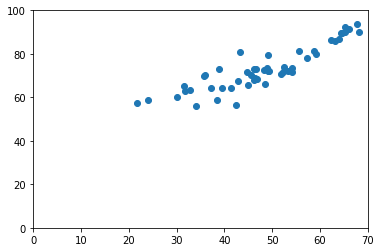

In [10]:
plt.plot(MagnetiteIsoDepths,SurfaceCurieIsoDepths,'o')
plt.xlim(0,70)
plt.ylim(0,100)
plt.show()
